In [16]:
import os
import sys

sys.path.append('..')

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
from sklearn.metrics import auc

In [19]:
def draw_roc_curve(title, fprs, tprs, aucs):
    plt.figure(figsize=(3.6, 3.6))
    plt.xlim(0., 1.1)
    plt.ylim(0., 1.1)
    plt.plot(fprs[0], tprs[0], color='yellowgreen', label='Stage 1: ROC (AUC = %0.4f)' % aucs[0])
    plt.plot(fprs[1], tprs[1], color='dodgerblue', label='Stage 2: ROC (AUC = %0.4f)' % aucs[1])
    plt.plot(fprs[2], tprs[2], color='purple', label='Stage 3: ROC (AUC = %0.4f)' % aucs[2])
    plt.legend(loc='lower right')
    # plt.title(title)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.savefig('{}.pdf'.format(title), format='pdf', dpi=400, bbox_inches='tight')

In [20]:
def get_elements(dfs):
    fprs = []
    tprs = []
    aucs = []
    for df in dfs:
        tpr = np.sort(df['tpr'].to_numpy())
        # tpr = df['tpr'].to_numpy()
        tprs.append(tpr)
        fpr = np.sort(df['fpr'].to_numpy())
        # fpr = df['fpr'].to_numpy()
        fprs.append(fpr)
        a = auc(fpr, tpr)
        aucs.append(a)
    return fprs, tprs, aucs

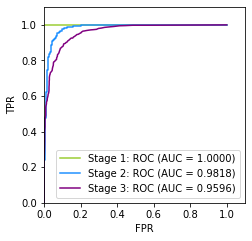

In [21]:
dfs = []
for i in range(1, 4):
    path = os.path.join('..', 'results', 'result_0', 'mnist_dnn', 'results', 'mnist_dnn_apgd_0.3_baard_s{}_roc.csv'.format(i))
    df = pd.read_csv(path)
    dfs.append(df)
    
fprs, tprs, aucs = get_elements(dfs)
draw_roc_curve('ROC Curve - MNIST APGD ε=0.3', fprs, tprs, aucs)

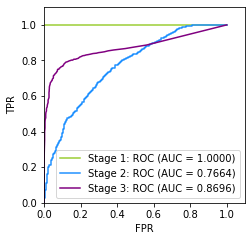

In [22]:
dfs = []
for i in range(1, 4):
    path = os.path.join('..', 'results', 'result_0', 'mnist_dnn', 'results', 'mnist_dnn_apgd2_2.0_baard_s{}_roc.csv'.format(i))
    df = pd.read_csv(path)
    dfs.append(df)
    
fprs, tprs, aucs = get_elements(dfs)
draw_roc_curve('ROC Curve - MNIST APGD L2 ε=2.0', fprs, tprs, aucs)

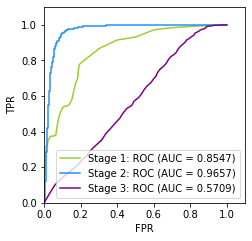

In [23]:
dfs = []
for i in range(1, 4):
    path = os.path.join('..', 'results', 'result_0', 'cifar10_resnet', 'results', 'cifar10_resnet_apgd_0.3_baard_s{}_roc.csv'.format(i))
    df = pd.read_csv(path)
    dfs.append(df)
    
fprs, tprs, aucs = get_elements(dfs)
draw_roc_curve('ROC Curve - CIFAR10 APGD ε=0.3', fprs, tprs, aucs)

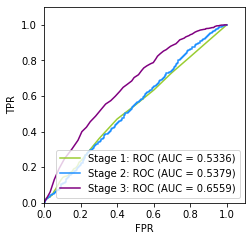

In [24]:
dfs = []
for i in range(1, 4):
    path = os.path.join('..', 'results', 'result_0', 'cifar10_resnet', 'results', 'cifar10_resnet_apgd2_2.0_baard_s{}_roc.csv'.format(i))
    df = pd.read_csv(path)
    dfs.append(df)
    
fprs, tprs, aucs = get_elements(dfs)
draw_roc_curve('ROC Curve - CIFAR10 APGD L2 ε=2.0', fprs, tprs, aucs)

In [25]:
# data = 'banknote'
# model = 'dnn'
# att = 'apgd'
# eps = '0.3'
# dfs = []
# for i in range(1, 4):
#     path = os.path.join('..', 'results', 'result_0', '{}_{}'.format(data, model), 'results', '{}_{}_{}_{}_baard_s{}_roc.csv'.format(data, model, att, eps, i))
#     df = pd.read_csv(path)
#     dfs.append(df)
    
# fprs, tprs, aucs = get_elements(dfs)
# draw_roc_curve('ROC Curve - Banknote apgd 0.3', fprs, tprs, aucs)

In [26]:
# data = 'banknote'
# model = 'dnn'
# att = 'apgd2'
# eps = '2.0'
# dfs = []
# for i in range(1, 4):
#     path = os.path.join('..', 'results', 'result_0', '{}_{}'.format(data, model), 'results', '{}_{}_{}_{}_baard_s{}_roc.csv'.format(data, model, att, eps, i))
#     df = pd.read_csv(path)
#     dfs.append(df)
    
# fprs, tprs, aucs = get_elements(dfs)
# draw_roc_curve('ROC Curve - Banknote apgd2 2.0', fprs, tprs, aucs)

In [27]:
# data = 'breastcancer'
# model = 'dnn'
# att = 'apgd'
# eps = '0.3'
# dfs = []
# for i in range(1, 4):
#     path = os.path.join('..', 'results', 'result_0', '{}_{}'.format(data, model), 'results', '{}_{}_{}_{}_baard_s{}_roc.csv'.format(data, model, att, eps, i))
#     df = pd.read_csv(path)
#     dfs.append(df)
    
# fprs, tprs, aucs = get_elements(dfs)
# draw_roc_curve('ROC Curve - BreastCancer apgd 0.3', fprs, tprs, aucs)

In [28]:
# data = 'breastcancer'
# model = 'dnn'
# att = 'apgd2'
# eps = '2.0'
# dfs = []
# for i in range(1, 4):
#     path = os.path.join('..', 'results', 'result_0', '{}_{}'.format(data, model), 'results', '{}_{}_{}_{}_baard_s{}_roc.csv'.format(data, model, att, eps, i))
#     df = pd.read_csv(path)
#     dfs.append(df)
    
# fprs, tprs, aucs = get_elements(dfs)
# draw_roc_curve('ROC Curve - BreastCancer apgd2 2.0', fprs, tprs, aucs)

In [29]:
# data = 'htru2'
# model = 'dnn'
# att = 'apgd'
# eps = '0.3'
# dfs = []
# for i in range(1, 4):
#     path = os.path.join('..', 'results', 'result_0', '{}_{}'.format(data, model), 'results', '{}_{}_{}_{}_baard_s{}_roc.csv'.format(data, model, att, eps, i))
#     df = pd.read_csv(path)
#     dfs.append(df)
    
# fprs, tprs, aucs = get_elements(dfs)
# draw_roc_curve('ROC Curve - HTRU2 apgd 0.3', fprs, tprs, aucs)

In [30]:
# data = 'htru2'
# model = 'dnn'
# att = 'apgd2'
# eps = '2.0'
# dfs = []
# for i in range(1, 4):
#     path = os.path.join('..', 'results', 'result_0', '{}_{}'.format(data, model), 'results', '{}_{}_{}_{}_baard_s{}_roc.csv'.format(data, model, att, eps, i))
#     df = pd.read_csv(path)
#     dfs.append(df)
    
# fprs, tprs, aucs = get_elements(dfs)
# draw_roc_curve('ROC Curve - HTRU2 apgd2 2.0', fprs, tprs, aucs)